In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-10-14 14:03:07--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-10-14 14:03:07 (40.7 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
#factorize categorical data
dataset["sex"] = pd.factorize(dataset["sex"])[0]
dataset["smoker"] = pd.factorize(dataset["smoker"])[0]
dataset["expenses"] = pd.factorize(dataset["expenses"])[0]
dataset["region"] = pd.factorize(dataset["region"])[0]
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,1,31.0,3,1,2,1332
1334,18,0,31.9,0,1,3,1333
1335,18,0,36.9,0,1,1,1334
1336,21,0,25.8,0,1,0,1335
1337,61,0,29.1,0,0,2,1336


Separate the data

In [ ]:
#create test and train datasets
def sample_first_prows(data, perc=0.8):
    import pandas as pd
    return data.head(int(len(data)*(perc)))

train = sample_first_prows(dataset)
test_dataset = dataset.iloc[max(train.index):]
train.tail()
#https://stackoverflow.com/questions/50173283/pandas-get-first-n-rows-based-on-percentage

,age,sex,bmi,children,smoker,region,expenses
1065,42,0,25.3,1,1,0,1064
1066,48,1,37.3,2,1,1,1065
1067,39,1,42.7,0,1,3,1066
1068,63,1,21.7,1,1,2,1067
1069,54,0,31.9,1,1,1,1068


Create labels

In [ ]:
train_labels = train.pop("expenses")
test_labels = test_dataset.pop("expenses")

Create model - Normalize Features

In [ ]:
normalize = tf.keras.layers.Normalization(axis=-1)

normalize.adapt(np.array(train))

In [ ]:
model  = tf.keras.Sequential([
    normalize,
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_11 (Dense)            (None, 32)                224       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 270
Trainable params: 257
Non-trainable params: 13
_________________________________________________________________


Train - Compile

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.4),
    loss='mae',
    metrics=['mae','mse'])

history = model.fit(
    train,
    train_labels,
    epochs=60,
    verbose=0)

9/9 - 0s - loss: 666.5480 - mae: 666.5480 - mse: 451646.3125 - 145ms/epoch - 16ms/step
Testing set Mean Abs Error: 666.55 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


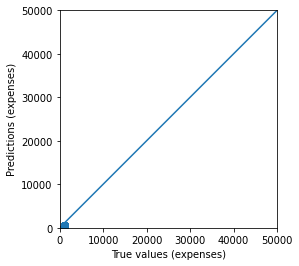

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
